In [1]:
from remote.readers import NumpyVideo
from remote.validation import VideoValidator, ColorDistributionFrameValidator
from remote.measurement.heart_rate import ParaboloidHRE
from remote.measurement.roi import RedThresholdROI

In [2]:
vid = NumpyVideo('data/jmg-lamp.mp4')
frame_validator = ColorDistributionFrameValidator(vid.channel_map)
validator = VideoValidator(frame_validator)
all_valid, results = validator.validate(vid)

In [3]:
roi_detector = RedThresholdROI()
roi_detector.fit(vid)

In [4]:
hre = ParaboloidHRE(roi_detector)

In [5]:
hre.measure(vid)

62.134529440389294

## Evaluation

In [1]:
import numpy as np
import pandas as pd
from remote.readers import NumpyVideo
from remote.validation import VideoValidator, ColorDistributionFrameValidator
from remote.measurement.heart_rate import ParaboloidHRE, AverageHRE
from remote.measurement.spo2 import LinearSpO2Estimator
from remote.measurement.roi import RedThresholdROI, FullChannelROI
from remote.evaluation import Experiment, evaluate

In [2]:
experiments = [Experiment(validator=VideoValidator(ColorDistributionFrameValidator),
                          bpm=AverageHRE(RedThresholdROI()),
                          spo2=LinearSpO2Estimator(RedThresholdROI())),
               Experiment(validator=VideoValidator(ColorDistributionFrameValidator),
                          bpm=ParaboloidHRE(RedThresholdROI()),
                          spo2=LinearSpO2Estimator(RedThresholdROI())),
               Experiment(validator=VideoValidator(ColorDistributionFrameValidator),
                          bpm=AverageHRE(FullChannelROI(channel='r')),
                          spo2=LinearSpO2Estimator(FullChannelROI(channel='r'))),
               Experiment(validator=VideoValidator(ColorDistributionFrameValidator),
                          bpm=ParaboloidHRE(FullChannelROI(channel='r')),
                          spo2=LinearSpO2Estimator(FullChannelROI(channel='r')))]

In [3]:
df = evaluate('data/validation/meta.csv', data_dir='data/validation/', experiments=experiments)

Evaluating 1.mp4, validating with VideoValidator with ColorDistribution,
estimating BPM with Average with RedThreshold and SpO2 with Linear with RedThreshold
Evaluating 1.mp4, validating with VideoValidator with ColorDistribution,
estimating BPM with Paraboloid with RedThreshold and SpO2 with Linear with RedThreshold
Evaluating 1.mp4, validating with VideoValidator with ColorDistribution,
estimating BPM with Average with Full Channel and SpO2 with Linear with Full Channel
Evaluating 1.mp4, validating with VideoValidator with ColorDistribution,
estimating BPM with Paraboloid with Full Channel and SpO2 with Linear with Full Channel
Evaluating 2.mp4, validating with VideoValidator with ColorDistribution,
estimating BPM with Average with RedThreshold and SpO2 with Linear with RedThreshold
Evaluating 2.mp4, validating with VideoValidator with ColorDistribution,
estimating BPM with Paraboloid with RedThreshold and SpO2 with Linear with RedThreshold
Evaluating 2.mp4, validating with VideoVali

/Users/juangutierrez/Documents/factored/other_projects/covid_global_hackathon/remote/measurement/spo2.py:23: RuntimeWarning: invalid value encountered in double_scalars
  spo2 = self.A - self.B * ((s_r / m_r) / (s_b / m_b))


Evaluating israel.MOV, validating with VideoValidator with ColorDistribution,
estimating BPM with Paraboloid with RedThreshold and SpO2 with Linear with RedThreshold
Evaluating israel.MOV, validating with VideoValidator with ColorDistribution,
estimating BPM with Average with Full Channel and SpO2 with Linear with Full Channel
Evaluating israel.MOV, validating with VideoValidator with ColorDistribution,
estimating BPM with Paraboloid with Full Channel and SpO2 with Linear with Full Channel
Evaluating israel2.MOV, validating with VideoValidator with ColorDistribution,
estimating BPM with Average with RedThreshold and SpO2 with Linear with RedThreshold
Evaluating israel2.MOV, validating with VideoValidator with ColorDistribution,
estimating BPM with Paraboloid with RedThreshold and SpO2 with Linear with RedThreshold
Evaluating israel2.MOV, validating with VideoValidator with ColorDistribution,
estimating BPM with Average with Full Channel and SpO2 with Linear with Full Channel
Evaluating

In [4]:
df

,file,mode,light_source,spo2,bpm,validator,bpm_estimator,spo2_estimator,duration,correctness,predicted_bpm,predicted_spo2,percentual_error_bpm,percentual_error_spo2
0,1.mp4,transmission,white-bulb,93.0,79.0,VideoValidator with ColorDistribution,Average with RedThreshold,Linear with RedThreshold,25.961667,0.395379,0.000000,99.206227,1.000000,0.066734
1,1.mp4,transmission,white-bulb,93.0,79.0,VideoValidator with ColorDistribution,Paraboloid with RedThreshold,Linear with RedThreshold,25.961667,0.395379,0.000000,99.206227,1.000000,0.066734
2,1.mp4,transmission,white-bulb,93.0,79.0,VideoValidator with ColorDistribution,Average with Full Channel,Linear with Full Channel,25.961667,0.395379,0.000000,98.642976,1.000000,0.060677
3,1.mp4,transmission,white-bulb,93.0,79.0,VideoValidator with ColorDistribution,Paraboloid with Full Channel,Linear with Full Channel,25.961667,0.395379,0.000000,98.642976,1.000000,0.060677
4,2.mp4,transmission,white-bulb,94.0,86.0,VideoValidator with ColorDistribution,Average with RedThreshold,Linear with RedThreshold,20.728333,1.000000,0.000000,99.356579,1.000000,0.056985
5,2.mp4,transmission,white-bulb,94.0,86.0,VideoValidator with ColorDistribution,Paraboloid with RedThreshold,Linear with RedThreshold,20.728333,1.000000,0.000000,99.356579,1.000000,0.056985
6,2.mp4,transmission,white-bulb,94.0,86.0,VideoValidator with ColorDistribution,Average with Full Channel,Linear with Full Channel,20.728333,1.000000,0.000000,98.499931,1.000000,0.047872
7,2.mp4,transmission,white-bulb,94.0,86.0,VideoValidator with ColorDistribution,Paraboloid with Full Channel,Linear with Full Channel,20.728333,1.000000,31.992283,98.499931,0.627997,0.047872
8,3.mp4,transmission,white-bulb,92.0,83.0,VideoValidator with ColorDistribution,Average with RedThreshold,Linear with RedThreshold,20.495000,0.375610,1.999512,99.587968,0.975909,0.082478
9,3.mp4,transmission,white-bulb,92.0,83.0,VideoValidator with ColorDistribution,Paraboloid with RedThreshold,Linear with RedThreshold,20.495000,0.375610,1.999512,99.587968,0.975909,0.082478


In [3]:
from remote.measurement.heart_rate import OptimizedParaboloidHRE
from remote.readers import NumpyVideo
from remote.measurement.roi import RedThresholdROI
import time

In [5]:
video = NumpyVideo('data/validation/1.mp4')
s = time.time()
print(OptimizedParaboloidHRE(RedThresholdROI()).measure(video))
e = time.time()
print('Total time:', (e-s))

0.0
Total time: 138.52439713478088


In [6]:
res = OptimizedParaboloidHRE(RedThresholdROI()).measure(video, reduce=False)

In [10]:
import matplotlib.pyplot as plt
import numpy as np

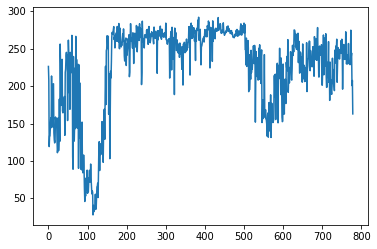

In [9]:
plt.plot(-res)

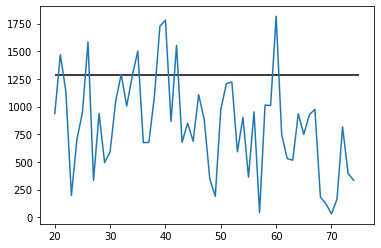

In [43]:
lims = (20, 75)
coefs = np.abs(np.fft.rfft(res)[lims[0]:lims[1]])
plt.plot(coefs)
plt.xticks([i for i in range(0, len(coefs), 10)], labels=[i for i in range(lims[0], lims[1] + 1, 10)])
plt.hlines(y=np.mean(coefs) + 1*np.std(coefs), xmin=0, xmax=len(coefs))

In [38]:
np.mean(coefs)

838.0897078630493

In [39]:
np.std(coefs)

446.3231873045348

In [20]:
z = np.flip(np.argsort(np.fft.rfft(res)[20:75])) + 20
z

array([60, 39, 35, 26, 34, 38, 59, 25, 44, 40, 64, 61, 45, 24, 50, 56, 58,
       48, 54, 49, 30, 65, 68, 27, 71, 57, 70, 62, 74, 36, 28, 29, 33, 69,
       23, 46, 63, 73, 55, 37, 31, 32, 72, 66, 43, 41, 53, 20, 51, 47, 67,
       22, 52, 21, 42])

In [21]:
60*z/30

array([120.,  78.,  70.,  52.,  68.,  76., 118.,  50.,  88.,  80., 128.,
       122.,  90.,  48., 100., 112., 116.,  96., 108.,  98.,  60., 130.,
       136.,  54., 142., 114., 140., 124., 148.,  72.,  56.,  58.,  66.,
       138.,  46.,  92., 126., 146., 110.,  74.,  62.,  64., 144., 132.,
        86.,  82., 106.,  40., 102.,  94., 134.,  44., 104.,  42.,  84.])

In [5]:
df.to_csv('results2.csv')

In [25]:
from remote.utils import coordinate_grid

video = NumpyVideo('data/validation/1.mp4')
frame = video.frames[100, :, :, video.channel_map['r']]
roi_detector = RedThresholdROI()
bpme = ParaboloidHRE(roi_detector)
bpme.fit(video)
roi = bpme.roi_detector.transform(video)[300]
w, h = frame.shape
frame_idxs = coordinate_grid(h, w)
roi = frame_idxs[roi]
cx = np.mean(roi[:, 1], dtype=np.int)
cy = np.mean(roi[:, 0], dtype=np.int)
centroid = np.array([cy, cx])
roi = np.insert(roi, 0, centroid, axis=0)
x_min, x_max = roi[:, 1].min(), roi[:, 1].max()
y_min, y_max = roi[:, 0].min(), roi[:, 0].max()

In [49]:
X = roi[:,1] - cx
Y = roi[:,0] - cy

In [50]:
R = np.sqrt(np.square(X) + np.square(Y))
T = np.arctan2(Y, X)

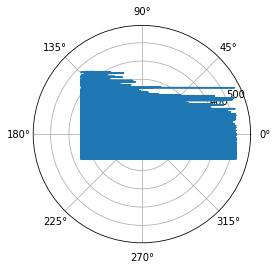

In [51]:
plt.polar(T, R)

In [64]:
frame.shape

(480, 848)

In [65]:
roi.shape

(200016, 2)

In [66]:
roi[T - degree_to_rad(45) == 0]

array([[138, 334],
       [139, 335],
       [140, 336],
       [141, 337],
       [142, 338],
       [143, 339],
       [144, 340],
       [145, 341],
       [146, 342],
       [147, 343],
       [148, 344],
       [149, 345],
       [150, 346],
       [152, 348],
       [153, 349],
       [154, 350],
       [155, 351],
       [156, 352],
       [157, 353],
       [158, 354],
       [159, 355],
       [160, 356],
       [161, 357],
       [162, 358],
       [163, 359],
       [164, 360],
       [165, 361],
       [166, 362],
       [167, 363],
       [168, 364],
       [169, 365],
       [170, 366],
       [171, 367],
       [172, 368],
       [173, 369],
       [174, 370],
       [175, 371],
       [176, 372],
       [177, 373],
       [178, 374],
       [179, 375],
       [180, 376],
       [181, 377],
       [182, 378],
       [183, 379],
       [184, 380],
       [185, 381],
       [186, 382],
       [187, 383],
       [188, 384],
       [189, 385],
       [190, 386],
       [191,

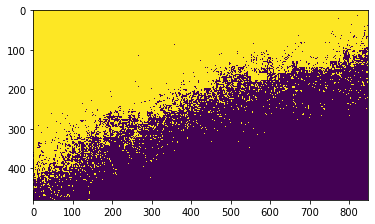

In [53]:
show_region_of_interest(frame, roi)

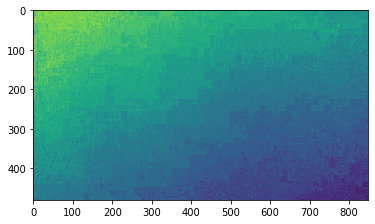

In [54]:
plt.imshow(frame)

In [55]:
import numpy as np
from remote.error_analysis import show_region_of_interest
from remote.utils import degree_to_rad

In [10]:
video.frames

array([], dtype=uint8)

In [11]:
import cv2

In [13]:
vid = cv2.VideoCapture('1.mp4')

In [17]:
vid.read()

(False, None)

### Signal Approach

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from remote.readers import NumpyVideo

In [2]:
video = NumpyVideo('data/validation/1.mp4')

In [28]:
def get_central_bounds(x_min, x_max, i, k):
    if i <= k//2:
        return 0, k
    elif i >= x_max - k//2:
        return x_max - k, x_max
    else:
        return i - k//2, i + k//2
    return lower, upper

In [38]:
n = len(video.frames)
k = 100
for i in range(n):
    lower, upper = get_central_bounds(0, n, i, k)
    means = video.frames[lower:upper, :, :, :].reshape(upper-lower, -1, 3).mean(axis=1).mean(axis=0)
    stds = video.frames[lower:upper, :, :, :].reshape(upper-lower, -1, 3).std(axis=1).std(axis=0)
    break

In [34]:
cube.shape

(100, 407040, 3)

In [37]:
cube.mean(axis=1).mean(axis=0).shape

(3,)

In [32]:
lower - upper

-100

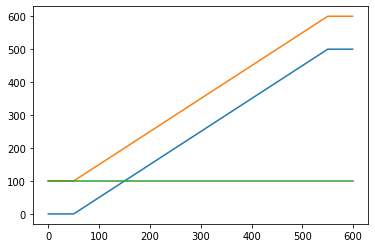

In [26]:
x = np.arange(0, 600)
y = np.array([get_central_average(0, 600, i, k=100) for i in x])
plt.plot(x, y, y.T[1] - y.T[0])

array([  0, 100])


## Custom Approach

In [122]:
import pandas as pd

df = pd.read_csv('data/validation/meta.csv')
df

//anaconda3/envs/covid/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


,file,mode,light_source,spo2,bpm
0,1.mp4,transmission,white-bulb,93.0,79.0
1,2.mp4,transmission,white-bulb,94.0,86.0
2,3.mp4,transmission,white-bulb,92.0,83.0
3,israel.MOV,transmission,yellow-lamp,NaN,71.0
4,israel2.MOV,transmission,yellow-lamp,NaN,71.0
5,israel3.MOV,reflection,white-led,NaN,82.5
6,israel4.MOV,reflection,white-led,NaN,82.5
7,israel5.MOV,transmission,white-bulb,NaN,82.5
8,sandra.mp4,transmission,yellow-bulb,99.0,67.0
9,sandra2.mp4,transmission,yellow-bulb,93.0,76.0


In [41]:
import os
import numpy as np
import matplotlib.pyplot as plt

from remote.readers import NumpyVideo

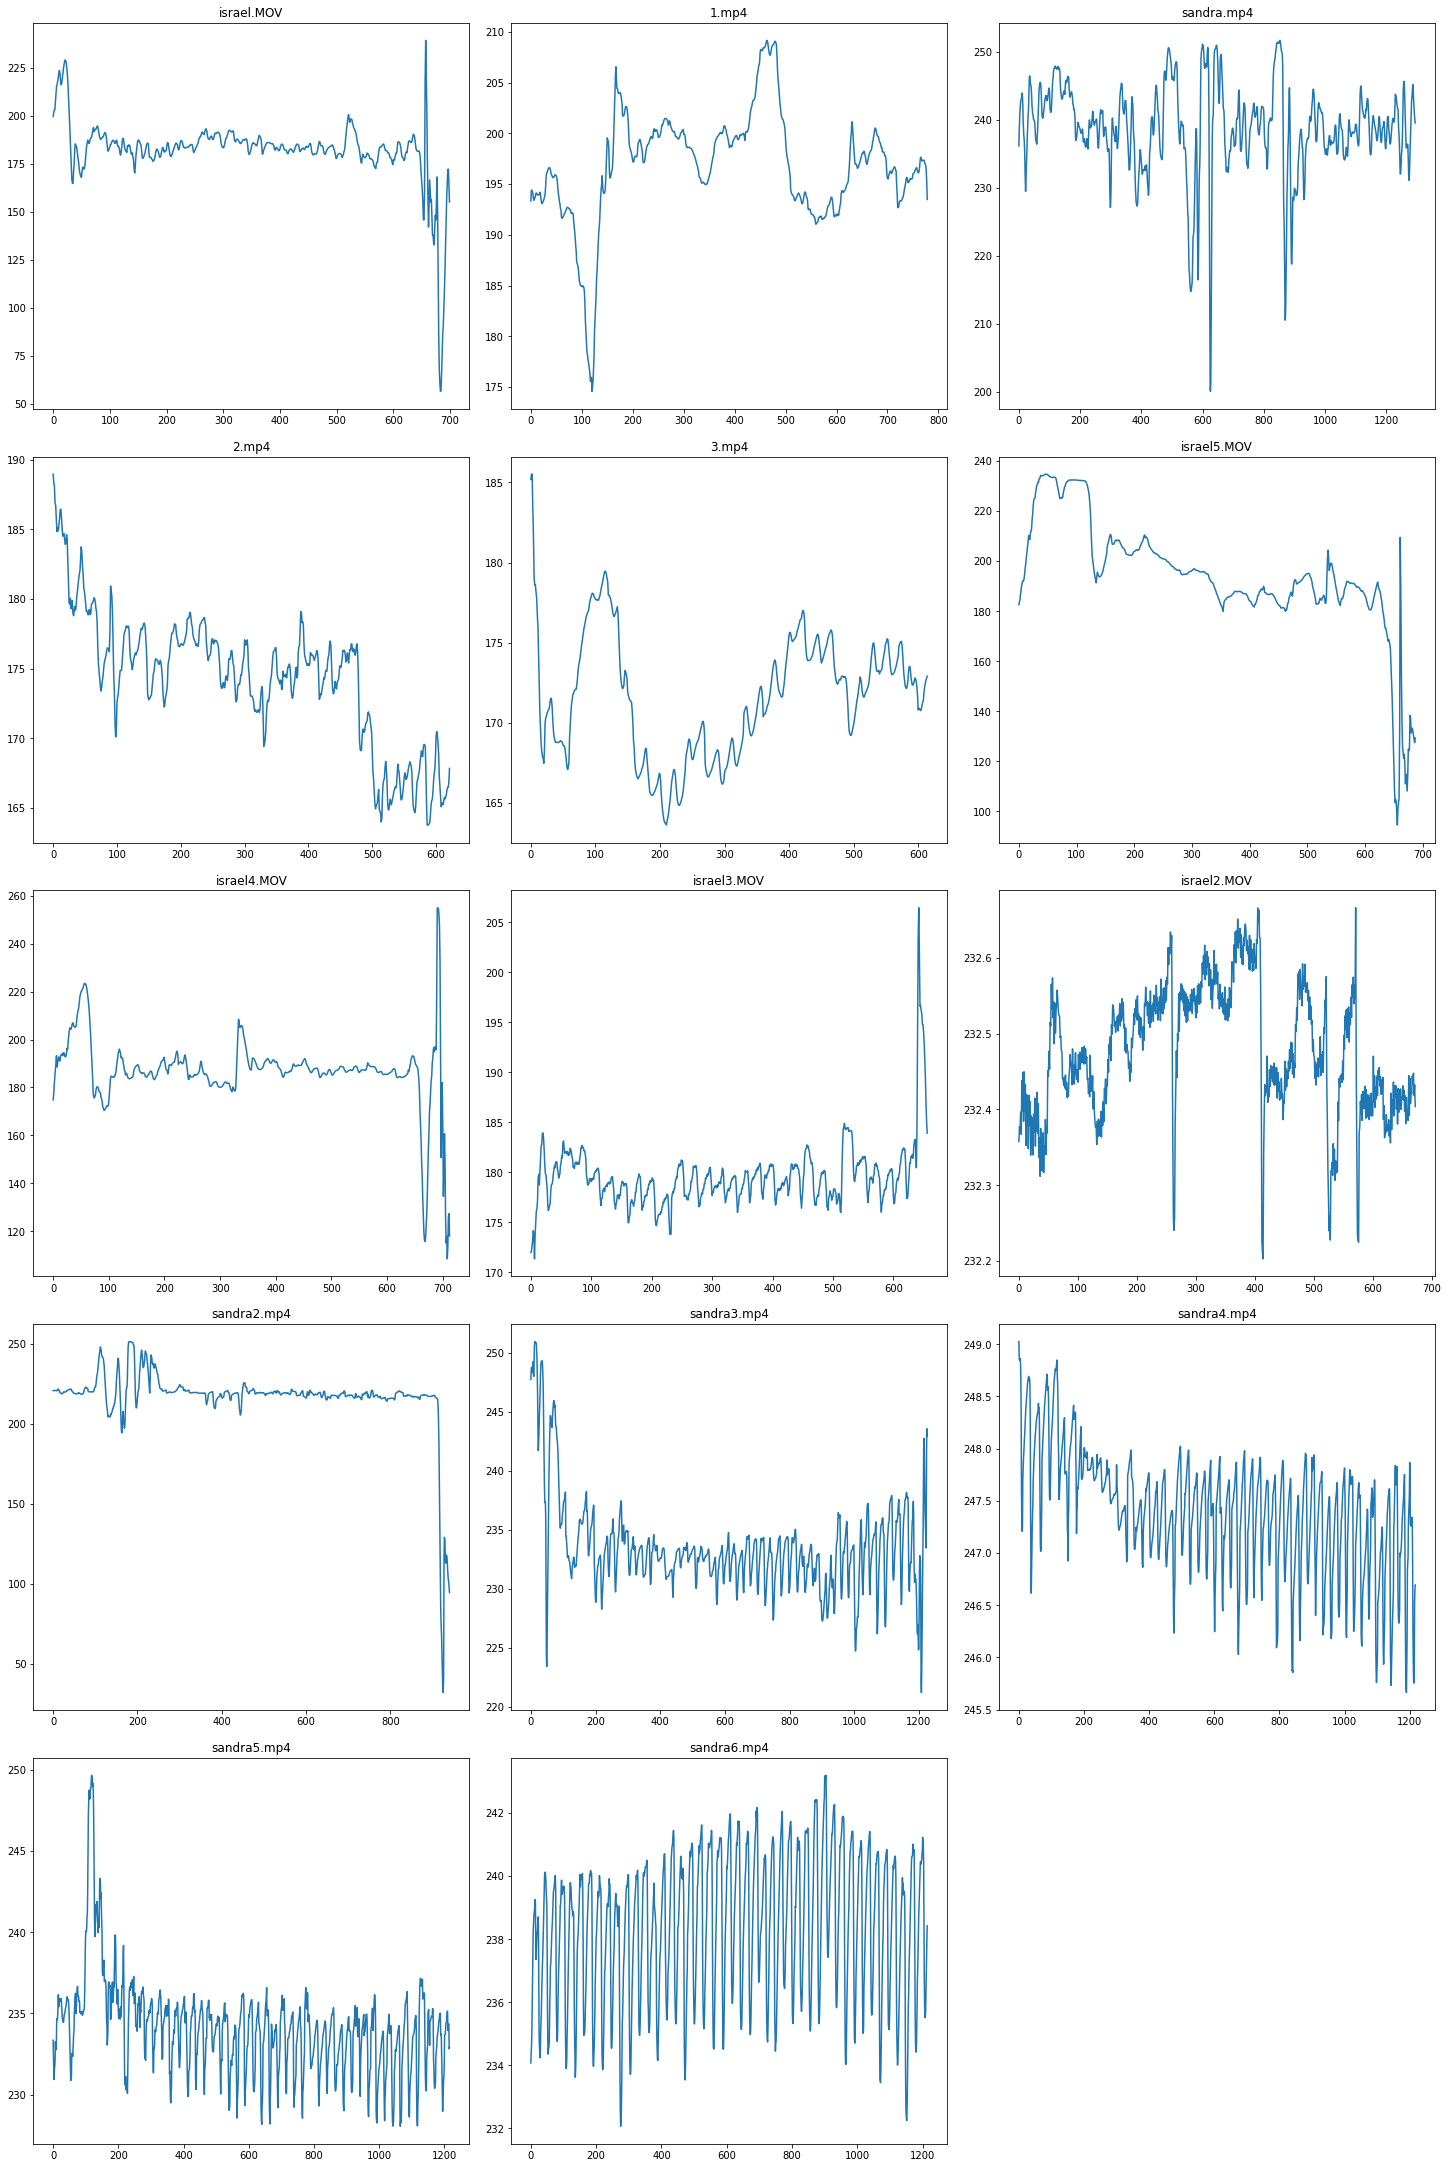

In [56]:
files = os.listdir('data/validation/')
files.remove('meta.csv')
figsize = (20, 30)
cols = 3
rows = len(files) // cols + 1

def trim_axs(axs, N):
    """
    Reduce *axs* to *N* Axes. All further Axes are removed from the figure.
    """
    axs = axs.flat
    for ax in axs[N:]:
        ax.remove()
    return axs[:N]

fig1, axs = plt.subplots(rows, cols, figsize=figsize, constrained_layout=True)
axs = trim_axs(axs, len(files))
for ax, file in zip(axs, files):
    ax.set_title(file)
    video = NumpyVideo(os.path.join('data/validation', file))
    frames = video.frames[:, :, :, video.channel_map['r']]
    signal = frames.reshape(len(frames), -1).mean(axis=1)
    ax.plot(signal)

In [85]:
from scipy import signal

In [83]:
def plot_signal_and_spectrum(s):
    fig, ax = plt.subplots(1, 2, figsize=(20, 6), constrained_layout=True)
    ax = ax.flat
    ax[0].plot(s)
    f = np.abs(np.fft.rfft(s))
    ax[1].plot(f)

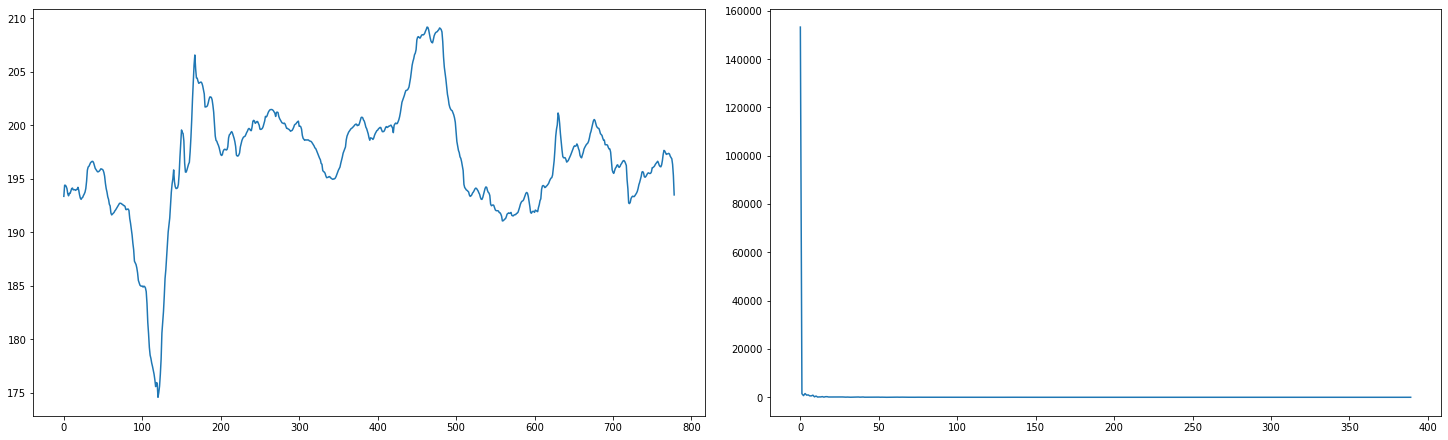

In [126]:
video = NumpyVideo(os.path.join('data/validation', '1.mp4'))
frames = video.frames[:, :, :, video.channel_map['r']]
s = frames.reshape(len(frames), -1).mean(axis=1)
plot_signal_and_spectrum(s)

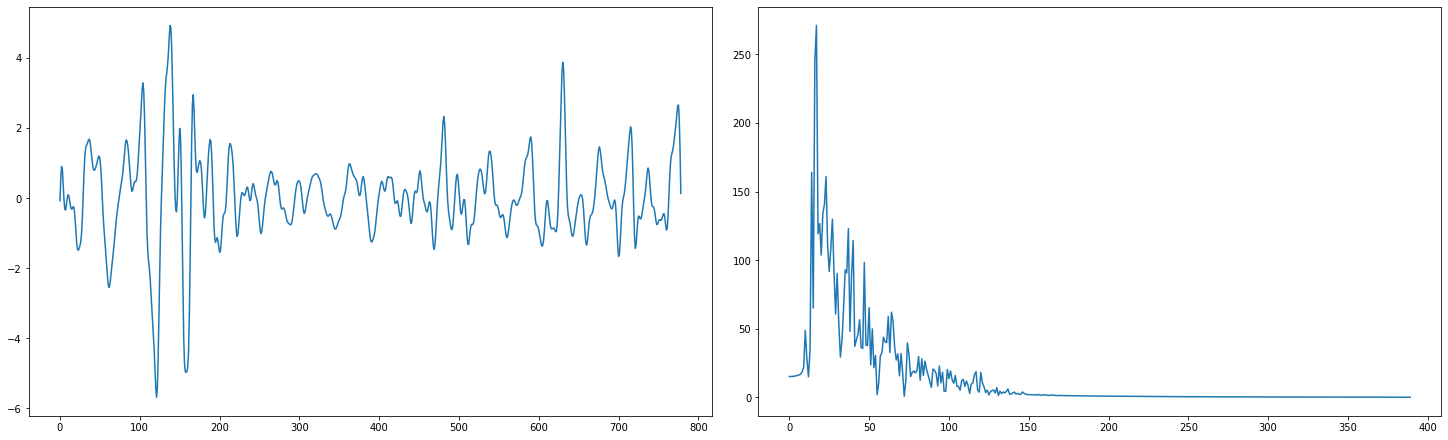

In [127]:
b, a = signal.butter(5, [0.5/(video.fps/2), 5/(video.fps/2)], 'bandpass')
output = signal.filtfilt(b, a, s)
plot_signal_and_spectrum(output)

In [130]:
np.argsort(np.abs(np.fft.rfft(output)))

array([389, 388, 387, 386, 385, 384, 383, 382, 381, 380, 379, 378, 377,
       376, 375, 374, 373, 372, 371, 370, 369, 368, 367, 366, 365, 364,
       363, 362, 361, 360, 359, 358, 357, 356, 355, 354, 353, 352, 351,
       350, 349, 348, 347, 346, 345, 344, 343, 342, 341, 340, 339, 338,
       337, 336, 335, 334, 333, 332, 331, 330, 329, 328, 327, 326, 325,
       324, 323, 322, 321, 320, 319, 318, 317, 316, 315, 314, 313, 312,
       311, 310, 309, 308, 307, 306, 305, 304, 303, 302, 301, 300, 299,
       298, 297, 296, 295, 294, 293, 292, 291, 290, 289, 288, 287, 286,
       285, 284, 283, 282, 281, 280, 279, 278, 277, 276, 275, 274, 273,
       272, 271, 270, 269, 268, 267, 266, 265, 264, 263, 262, 261, 260,
       259, 258, 257, 256, 255, 254, 253, 252, 251, 250, 249, 248, 247,
       246, 245, 244, 243, 242, 241, 240, 239, 238, 237, 236, 235, 234,
       233, 232, 231, 230, 229, 228, 227, 226, 225, 224, 223, 222, 221,
       220, 219, 218, 217, 216, 215, 214, 213, 212, 211, 210, 20

In [134]:
60*26/(800/30)

58.5

In [116]:
60*17/30

34.0

In [99]:
0.5*60/30

1.0

In [108]:
1200/30

40.0

In [109]:
60*44/40

66.0

In [117]:
60*26/(800/30)

58.5